In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [20]:
df = pd.read_csv('time_series.csv')

In [21]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [28]:
df.isnull().sum()

,0
Month,0
Sales of shampoo over a three year period,0


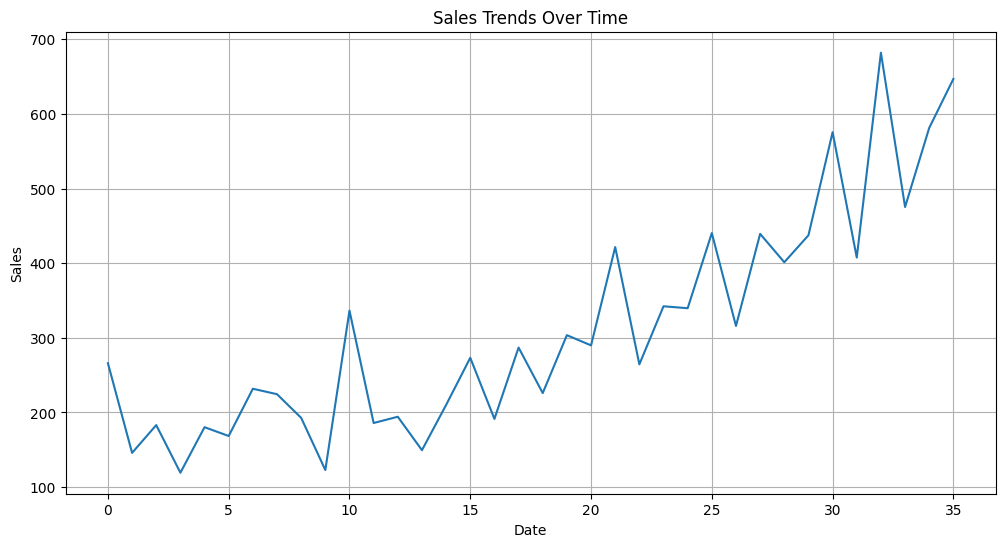

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Sales of shampoo over a three year period'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [23]:
train_size = int(len(df) * 0.8)
train_data, test_data = df['Sales of shampoo over a three year period'][:train_size], df['Sales of shampoo over a three year period'][train_size:]


In [24]:
p, d, q = 5, 1, 0
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

In [25]:
predictions = model_fit.predict(start=len(train_data), end=len(df) - 1)

# 6. Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

RMSE: 176.15509552751945


In [26]:
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Sales': forecast})
print("\nForecasted Sales:")
print(forecast_df)



Forecasted Sales:
                            Date  Forecasted Sales
28 1970-01-02 00:00:00.000000035        357.645324
29 1970-01-03 00:00:00.000000035        434.372064
30 1970-01-04 00:00:00.000000035        355.342891
31 1970-01-05 00:00:00.000000035        421.674965
32 1970-01-06 00:00:00.000000035        373.783514
33 1970-01-07 00:00:00.000000035        415.859998
34 1970-01-08 00:00:00.000000035        375.173510
35 1970-01-09 00:00:00.000000035        408.899708
36 1970-01-10 00:00:00.000000035        383.317737
37 1970-01-11 00:00:00.000000035        405.562067


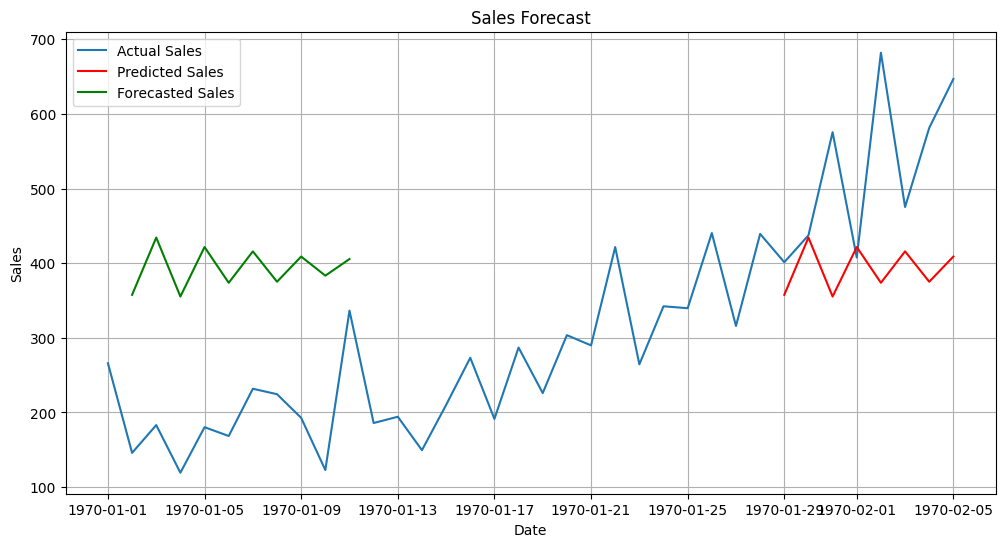

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales of shampoo over a three year period'], label='Actual Sales')
plt.plot(test_data.index, predictions, label='Predicted Sales', color='red')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Sales'], label='Forecasted Sales', color='green')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()